# [실습] RNN-단순 RNN, LSTM, GRU 모델 비교하기

### 1)  시퀀스 데이터 준비

In [1]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [2]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


In [2]:

from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

### 단순 RNN과 다층 RNN, LSTM, GRU 모델의 비교 
#### 1) 단순 RNN모델

In [4]:
simpltRNN_model = Sequential([
    SimpleRNN(units=256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])
simpltRNN_model.compile(loss='mse', metrics='mse', optimizer='adam')
simpltRNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
simpltRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 687ms/step - loss: 1.9192 - mse: 1.9192
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2541 - mse: 0.2541
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2131 - mse: 0.2131
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0863 - mse: 0.0863
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2155 - mse: 0.2155
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0247 - mse: 0.0247
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0458 - mse: 0.0458
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1165 - mse: 0.1165
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0591 - mse: 0.0591
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0023 - mse: 0.0023
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.031

In [6]:
result = simpltRNN_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {result}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 174ms/step
예측값: [2.4666028 2.5211189 2.5711944 2.6172595]
실제값: [2.6 2.7 2.8 2.9]


#### 2) 다층 RNN 모델

In [7]:
multiRNN = Sequential([
    SimpleRNN(units=256, return_sequences=True, input_shape=(16,1)),
    SimpleRNN(256, return_sequences=True),
    SimpleRNN(256, return_sequences=True),
    SimpleRNN(256, return_sequences=False),
    
    Dense(1)
])

In [8]:
multiRNN.compile(loss='mse', metrics='mse', optimizer='adam')
multiRNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 16, 256)           66048     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16, 256)           131328    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16, 256)           131328    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 460,289
Trainable params: 460,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
multiRNN.fit(train_seq_X, train_Y, epochs=100)
result = multiRNN.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {result}')
print(f'실제값: {test_Y}')

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.7129 - mse: 4.7129
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4883 - mse: 11.4883
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 7.2360 - mse: 7.2360
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0574 - mse: 0.0574
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5331 - mse: 0.5331
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.1648 - mse: 0.1648
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2004 - mse: 0.2004
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.3214 - mse: 0.3214
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0622 - mse: 0.0622
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1340 - mse: 0.1340
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - lo

#### 3) LSTM모델

In [10]:
LSTM_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])
LSTM_model.compile(loss='mse', metrics='mse', optimizer='adam')
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.3941 - mse: 4.3941
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 3.1964 - mse: 3.1964
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.1709 - mse: 2.1709
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 1.2688 - mse: 1.2688
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5079 - mse: 0.5079
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0444 - mse: 0.0444
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2984 - mse: 0.2984
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5628 - mse: 0.5628
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3098 - mse: 0.3098
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0671 - mse: 0.0671
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss:

In [11]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {result}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 359ms/step
예측값: [2.5661569 2.6504695 2.7322218 2.811476 ]
실제값: [2.6 2.7 2.8 2.9]


#### 4) GRU 모델

In [12]:
GRU_model = Sequential([
    GRU(256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])
GRU_model.compile(loss='mse', metrics='mse', optimizer='adam')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.6384 - mse: 3.6384
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 2.6850 - mse: 2.6850
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.8743 - mse: 1.8743
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1895 - mse: 1.1895
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6308 - mse: 0.6308
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2207 - mse: 0.2207
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0121 - mse: 0.0121
Epoch 8/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0789 - mse: 0.0789
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3127 - mse: 0.3127
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3792 - mse: 0.3792
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss

In [13]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {result}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 322ms/step
예측값: [2.5738    2.6674333 2.7605104 2.8530247]
실제값: [2.6 2.7 2.8 2.9]


# [quiz] Sign곡선(비선형 시퀀스) 예측
- Sign곡선에서 일부를 잘라 만든 시퀀스를 보고, 이 시퀀스 다음에 나타날 값을 예측하는 순환 신경망 모델 만들기

- 단순 RNN, LSTM, GRU 모델을 각각 구현하고 예측 성능을 비교하라

#### 데이터 준비

In [3]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [4]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [5]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
# 구간의 마지막 값이 정답 레이블
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

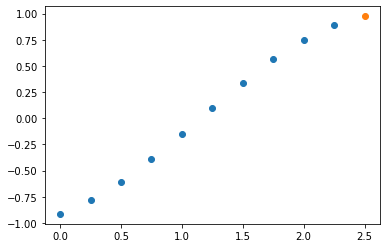

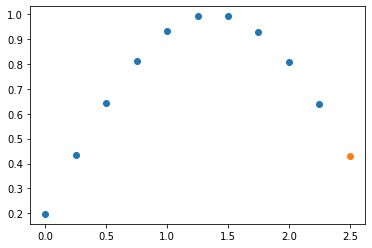

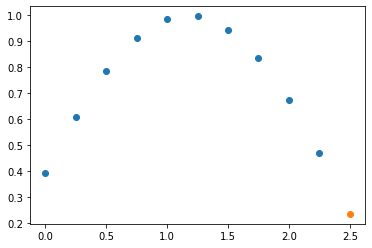

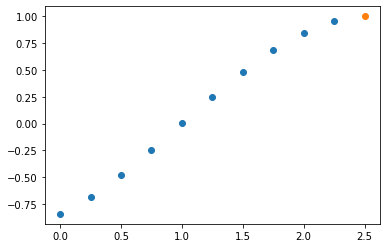

In [6]:
# 생성된 시퀀스 데이터 가운데 몇 개 확인
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [7]:
#  데이터 분할
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

* SimpleRNN 모델

* LSTM 모델

* GRU 모델